### Coordinate Descent Algorithm

In [11]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
#  boston house-prices dataset
data = load_boston()
X, y = data.data, data.target

X = StandardScaler().fit_transform(X)  # for easy convergence
X = np.hstack([X, np.ones((X.shape[0], 1))])

param = np.zeros(X.shape[1])

In [13]:
def func(x, y, param):
    return param[0] * x + param[1] * y

def costf(X, y, param):
    return np.sum((X.dot(param) - y) ** 2)/(2 * len(y))


In [14]:
def gradient_descent(X, y, param, eta=0.01, iter=300):
    cost_history = [0] * (iter+1)
    cost_history[0] = costf(X, y, param)  # you may want to save initial cost

    for iteration in range(iter):
        h = X.dot(param)
        loss = h - y.ravel()
        gradient = X.T.dot(loss)/(2 * len(y))
        param = param - eta * gradient
        cost = costf(X, y, param)
        #print(cost)
        cost_history[iteration+1] = cost

    return param, cost_history

In [15]:
def coordinate_descent(X, y, param, iter=300):
    cost_history = [0] * (iter+1)
    cost_history[0] = costf(X, y, param)

    for iteration in range(iter):
        for i in range(len(param)):
            dele = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            param[i] = np.dot(X[:,i].T, (y.ravel() - dele))/np.sum(np.square(X[:,i]))
            cost = costf(X, y, param)
            cost_history[iteration+1] = cost

    return param, cost_history

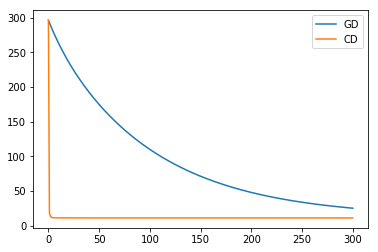

In [16]:
ret, xret = gradient_descent(X, y, param)
cret, cxret = coordinate_descent(X, y, param.copy())

plt.plot(range(len(xret)), xret, label="GD")
plt.plot(range(len(cxret)), cxret, label="CD")
plt.legend()